In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv('Wholesale Customer.csv')

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
df.shape

(440, 9)

<AxesSubplot:>

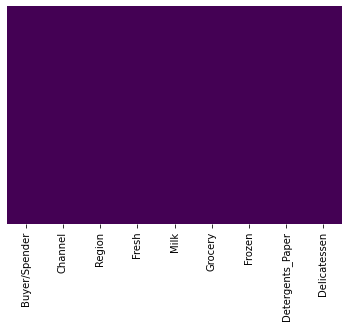

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [7]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [9]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [10]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [11]:
Channel_df=pd.DataFrame(df.groupby("Channel").sum().reset_index())
Channel_df

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [12]:
Channel_df['Total']=Channel_df.sum(axis=1)
Channel_df

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,8070603
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6645917


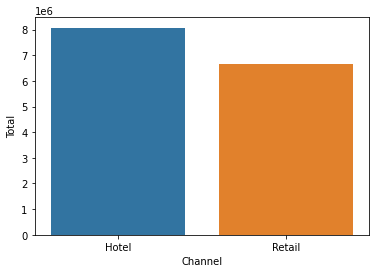

In [13]:
sns.barplot(x = 'Channel',
            y = 'Total',
            data = Channel_df)
plt.show()

##Hotels spent the most in terms of chanenel,and Retails spent the least.

In [14]:
Region_df=pd.DataFrame(df.groupby("Region").sum().reset_index())
Region_df

,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,18095,854833,422454,570037,231026,204136,104327
1,Oporto,14899,464721,239144,433274,190132,173311,54506
2,Other,64026,3960577,1888759,2495251,930492,890410,512110


In [15]:
Region_df['Total']=Region_df.sum(axis=1)
Region_df


,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,18095,854833,422454,570037,231026,204136,104327,2404908
1,Oporto,14899,464721,239144,433274,190132,173311,54506,1569987
2,Other,64026,3960577,1888759,2495251,930492,890410,512110,10741625


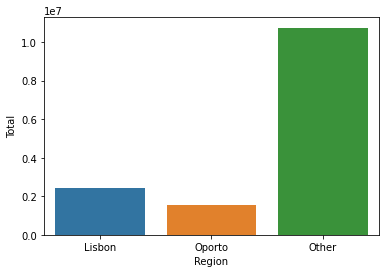

In [16]:
sns.barplot(x = 'Region',
            y = 'Total',
            data = Region_df)
plt.show()

##Other spent the most and Oporto spent the least.

<AxesSubplot:xlabel='Delicatessen', ylabel='Region'>

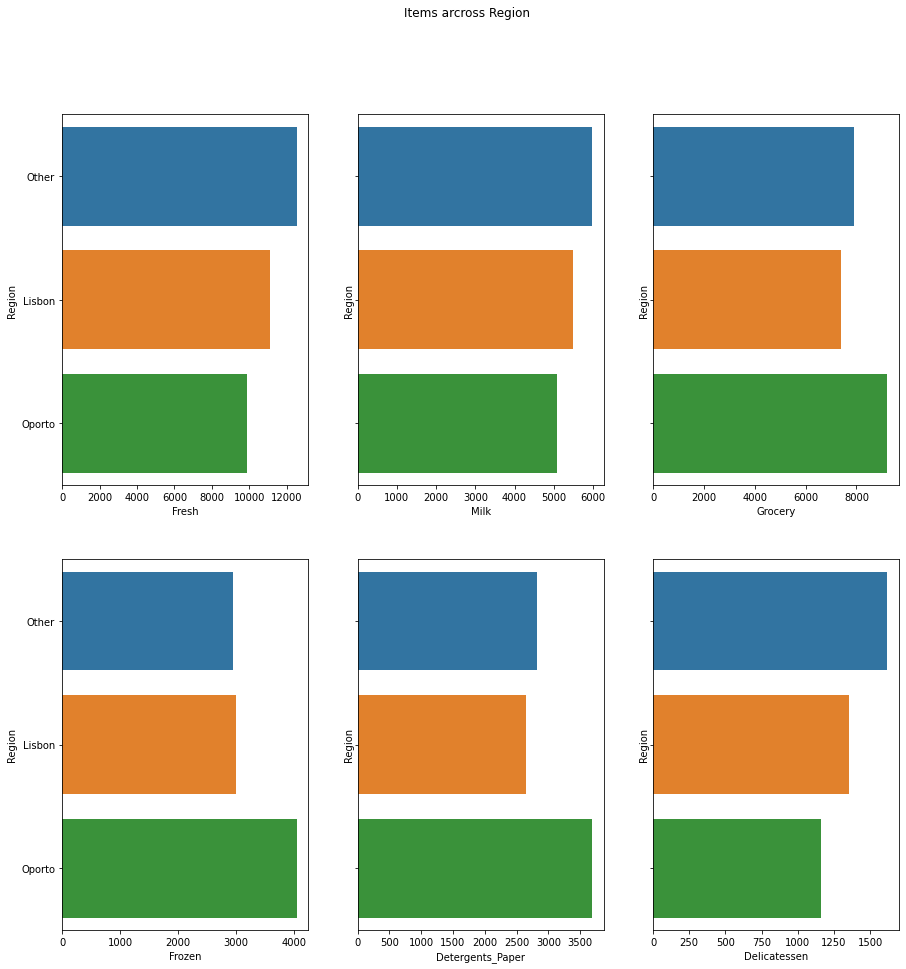

In [17]:

fig, axes = plt.subplots(2,3, figsize=(15, 15), sharey=True)
fig.suptitle('Items arcross Region')


# Fresh
sns.barplot(ax=axes[0,0], x='Fresh', y='Region',data=df,ci=None)

# Milk
sns.barplot(ax=axes[0,1], x='Milk', y='Region',data=df,ci=None)
# Grocery
sns.barplot(ax=axes[0,2], x='Grocery', y='Region',data=df,ci=None)

#Frozen
sns.barplot(ax=axes[1,0], x='Frozen', y='Region',data=df,ci=None)

#Detergents_Paper
sns.barplot(ax=axes[1,1], x='Detergents_Paper', y='Region',data=df,ci=None)

#Delicatessen
sns.barplot(ax=axes[1,2], x='Delicatessen', y='Region',data=df,ci=None)







<AxesSubplot:xlabel='Delicatessen', ylabel='Channel'>

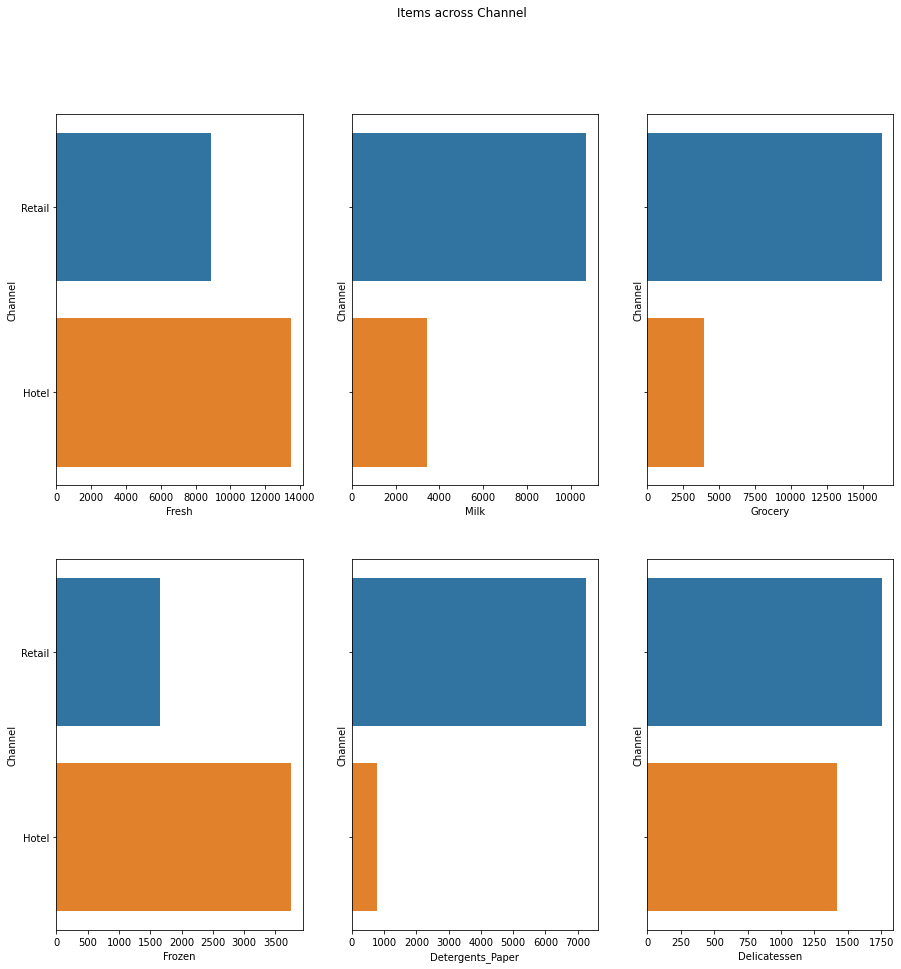

In [18]:

fig, axes = plt.subplots(2,3, figsize=(15, 15), sharey=True)
fig.suptitle('Items across Channel')


# Fresh
sns.barplot(ax=axes[0,0], x='Fresh', y='Channel',data=df,ci=None)

# Milk
sns.barplot(ax=axes[0,1], x='Milk', y='Channel',data=df,ci=None)
# Grocery
sns.barplot(ax=axes[0,2], x='Grocery', y='Channel',data=df,ci=None)

#Frozen
sns.barplot(ax=axes[1,0], x='Frozen', y='Channel',data=df,ci=None)

#Detergents_Paper
sns.barplot(ax=axes[1,1], x='Detergents_Paper', y='Channel',data=df,ci=None)

#Delicatessen
sns.barplot(ax=axes[1,2], x='Delicatessen', y='Channel',data=df,ci=None)







In [31]:
Retail_df=df[df['Channel']=="Retail"]
Hotel_df=df[df['Channel']=="Hotel"]


In [32]:
Retail_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451


In [28]:
Hotel_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
8,9,Hotel,Other,5963,3648,6192,425,1716,750
15,16,Hotel,Other,10253,1114,3821,397,964,412
17,18,Hotel,Other,5876,6157,2933,839,370,4478
19,20,Hotel,Other,7780,2495,9464,669,2518,501


In [33]:
Retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,142.0,183.000000,132.136132,1.0,61.25,166.5,303.75,438.0
Fresh,142.0,8904.323944,8987.714750,18.0,2347.75,5993.5,12229.75,44466.0
Milk,142.0,10716.500000,9679.631351,928.0,5938.00,7812.0,12162.75,73498.0
Grocery,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0
Frozen,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0
Detergents_Paper,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.50,40827.0
Delicatessen,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.00,16523.0


In [34]:
Hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,298.0,238.369128,120.910343,4.0,137.25,241.5,344.50,440.0
Fresh,298.0,13475.560403,13831.687502,3.0,4070.25,9581.5,18274.75,112151.0
Milk,298.0,3451.724832,4352.165571,55.0,1164.50,2157.0,4029.50,43950.0
Grocery,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0
Frozen,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0
Detergents_Paper,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.50,6907.0
Delicatessen,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.00,47943.0


In [39]:
Lisbon_df=df[df['Region']=="Lisbon"]
Oporto_df=df[df['Region']=="Oporto"]
Other_df=df[df['Region']=="Other"]



In [40]:
Lisbon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,77.0,235.000000,22.371857,197.0,216.0,235.0,254.0,273.0
Fresh,77.0,11101.727273,11557.438575,18.0,2806.0,7363.0,15218.0,56083.0
Milk,77.0,5486.415584,5704.856079,258.0,1372.0,3748.0,7503.0,28326.0
Grocery,77.0,7403.077922,8496.287728,489.0,2046.0,3838.0,9490.0,39694.0
Frozen,77.0,3000.337662,3092.143894,61.0,950.0,1801.0,4324.0,18711.0
Detergents_Paper,77.0,2651.116883,4208.462708,5.0,284.0,737.0,3593.0,19410.0
Delicatessen,77.0,1354.896104,1345.423340,7.0,548.0,806.0,1775.0,6854.0


In [41]:
Oporto_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,47.0,317.000000,13.711309,294.0,305.5,317.0,328.5,340.0
Fresh,47.0,9887.680851,8387.899211,3.0,2751.5,8090.0,14925.5,32717.0
Milk,47.0,5088.170213,5826.343145,333.0,1430.5,2374.0,5772.5,25071.0
Grocery,47.0,9218.595745,10842.745314,1330.0,2792.5,6114.0,11758.5,67298.0
Frozen,47.0,4045.361702,9151.784954,131.0,811.5,1455.0,3272.0,60869.0
Detergents_Paper,47.0,3687.468085,6514.717668,15.0,282.5,811.0,4324.5,38102.0
Delicatessen,47.0,1159.702128,1050.739841,51.0,540.5,898.0,1538.5,5609.0


In [42]:
Other_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,316.0,202.613924,143.615303,1.0,79.75,158.5,361.25,440.0
Fresh,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.50,112151.0
Milk,316.0,5977.085443,7935.463443,55.0,1634.00,3684.5,7198.75,73498.0
Grocery,316.0,7896.363924,9537.287778,3.0,2141.50,4732.0,10559.75,92780.0
Frozen,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0
Detergents_Paper,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0
Delicatessen,316.0,1620.601266,3232.581660,3.0,402.00,994.0,1832.75,47943.0


In [45]:
from scipy.stats import skew

The skew is 2.561322751927935


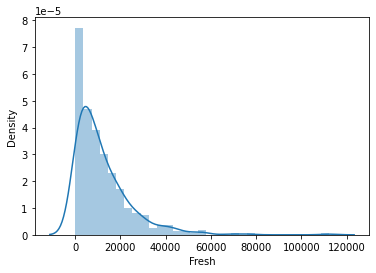

In [68]:
df_variability=df[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]]
sns.distplot(df_variability["Fresh"])
print("The skew is",df['Fresh'].skew())


The skew is 4.053754849210881


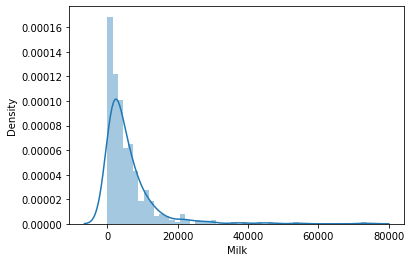

In [69]:
sns.distplot(df_variability["Milk"])
print("The skew is",df["Milk"].skew())

The skew is 3.5874286903915453


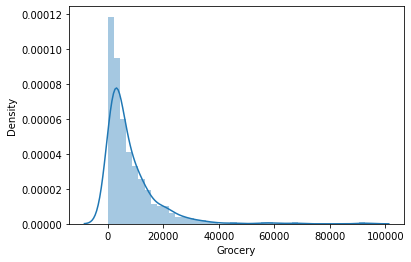

In [70]:
sns.distplot(df_variability["Grocery"])
print("The skew is",df["Grocery"].skew())

The skew is 5.9079856924559575


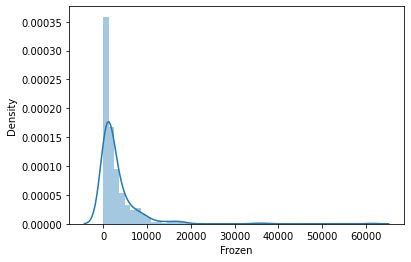

In [71]:
sns.distplot(df_variability["Frozen"])
print("The skew is",df["Frozen"].skew())

The skew is 3.6318506306913645


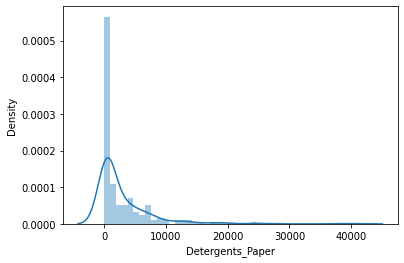

In [72]:
sns.distplot(df["Detergents_Paper"])
print("The skew is",df["Detergents_Paper"].skew())

The skew is 11.151586478906117


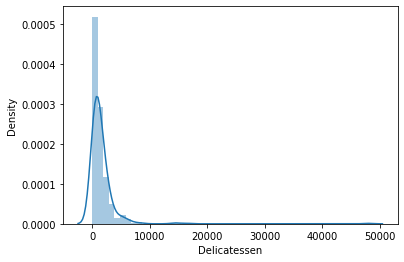

In [73]:
sns.distplot(df_variability["Delicatessen"])
print("The skew is",df["Delicatessen"].skew())

In [74]:
df.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [77]:
df.mean()

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [78]:
#because the values are different , we use coefccient of varaition
df.std()/df.mean()

##Thus Delicatessen varies the most and is the most unstabel

Buyer/Spender       0.576695
Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

In [75]:
Region_std=pd.DataFrame(df.groupby("Region").std().reset_index())
Region_std


,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,22.371857,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340
1,Oporto,13.711309,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841
2,Other,143.615303,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660


In [76]:
Channel_std=pd.DataFrame(df.groupby("Channel").std().reset_index())
Channel_std

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,120.910343,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
1,Retail,132.136132,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047


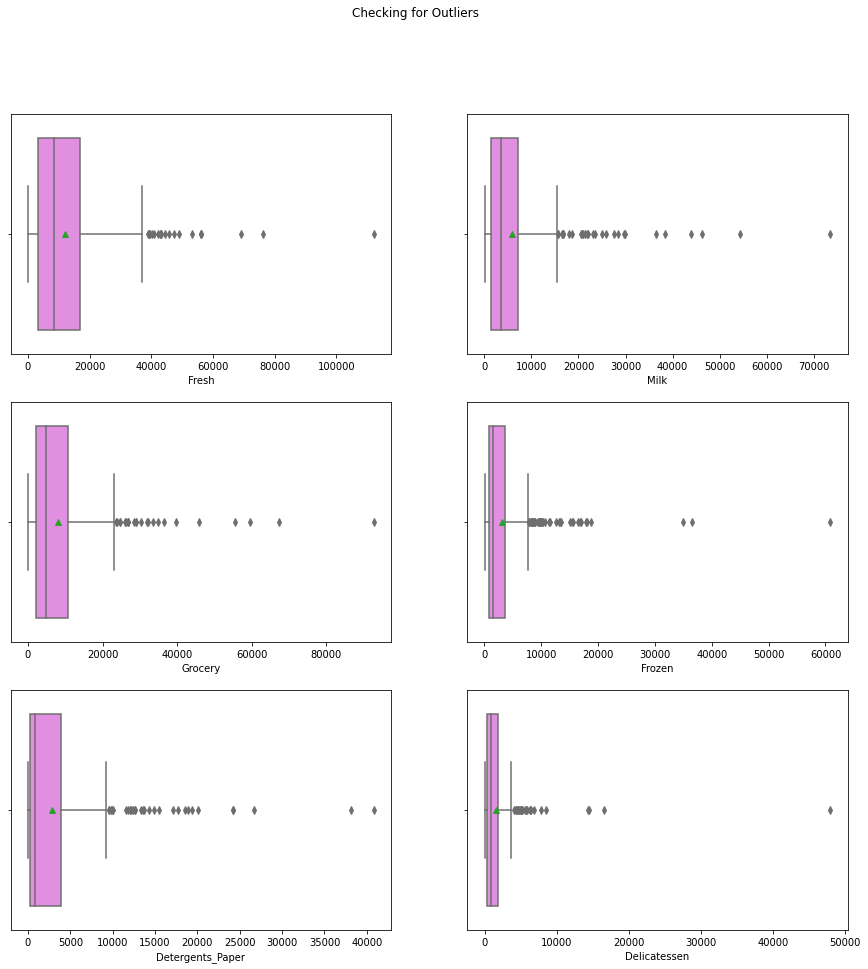

In [56]:

fig, axes = plt.subplots(3,2, figsize=(15, 15), sharey=True)
fig.suptitle('Checking for Outliers')


# Fresh
sns.boxplot(ax=axes[0,0], x='Fresh',color='Violet',data=df,showmeans=True)

# Milk
sns.boxplot(ax=axes[0,1], x='Milk',color='Violet',data=df,showmeans=True)
# Grocery
sns.boxplot(ax=axes[1,0], x='Grocery',color='Violet',data=df,showmeans=True)

#Frozen
sns.boxplot(ax=axes[1,1], x='Frozen',color='Violet',data=df,showmeans=True)

#Detergents_Paper
sns.boxplot(ax=axes[2,0], x='Detergents_Paper',color='Violet',data=df,showmeans=True)

#Delicatessen
sns.boxplot(ax=axes[2,1], x='Delicatessen',color='Violet',data=df,showmeans=True)

plt.show()





<AxesSubplot:>

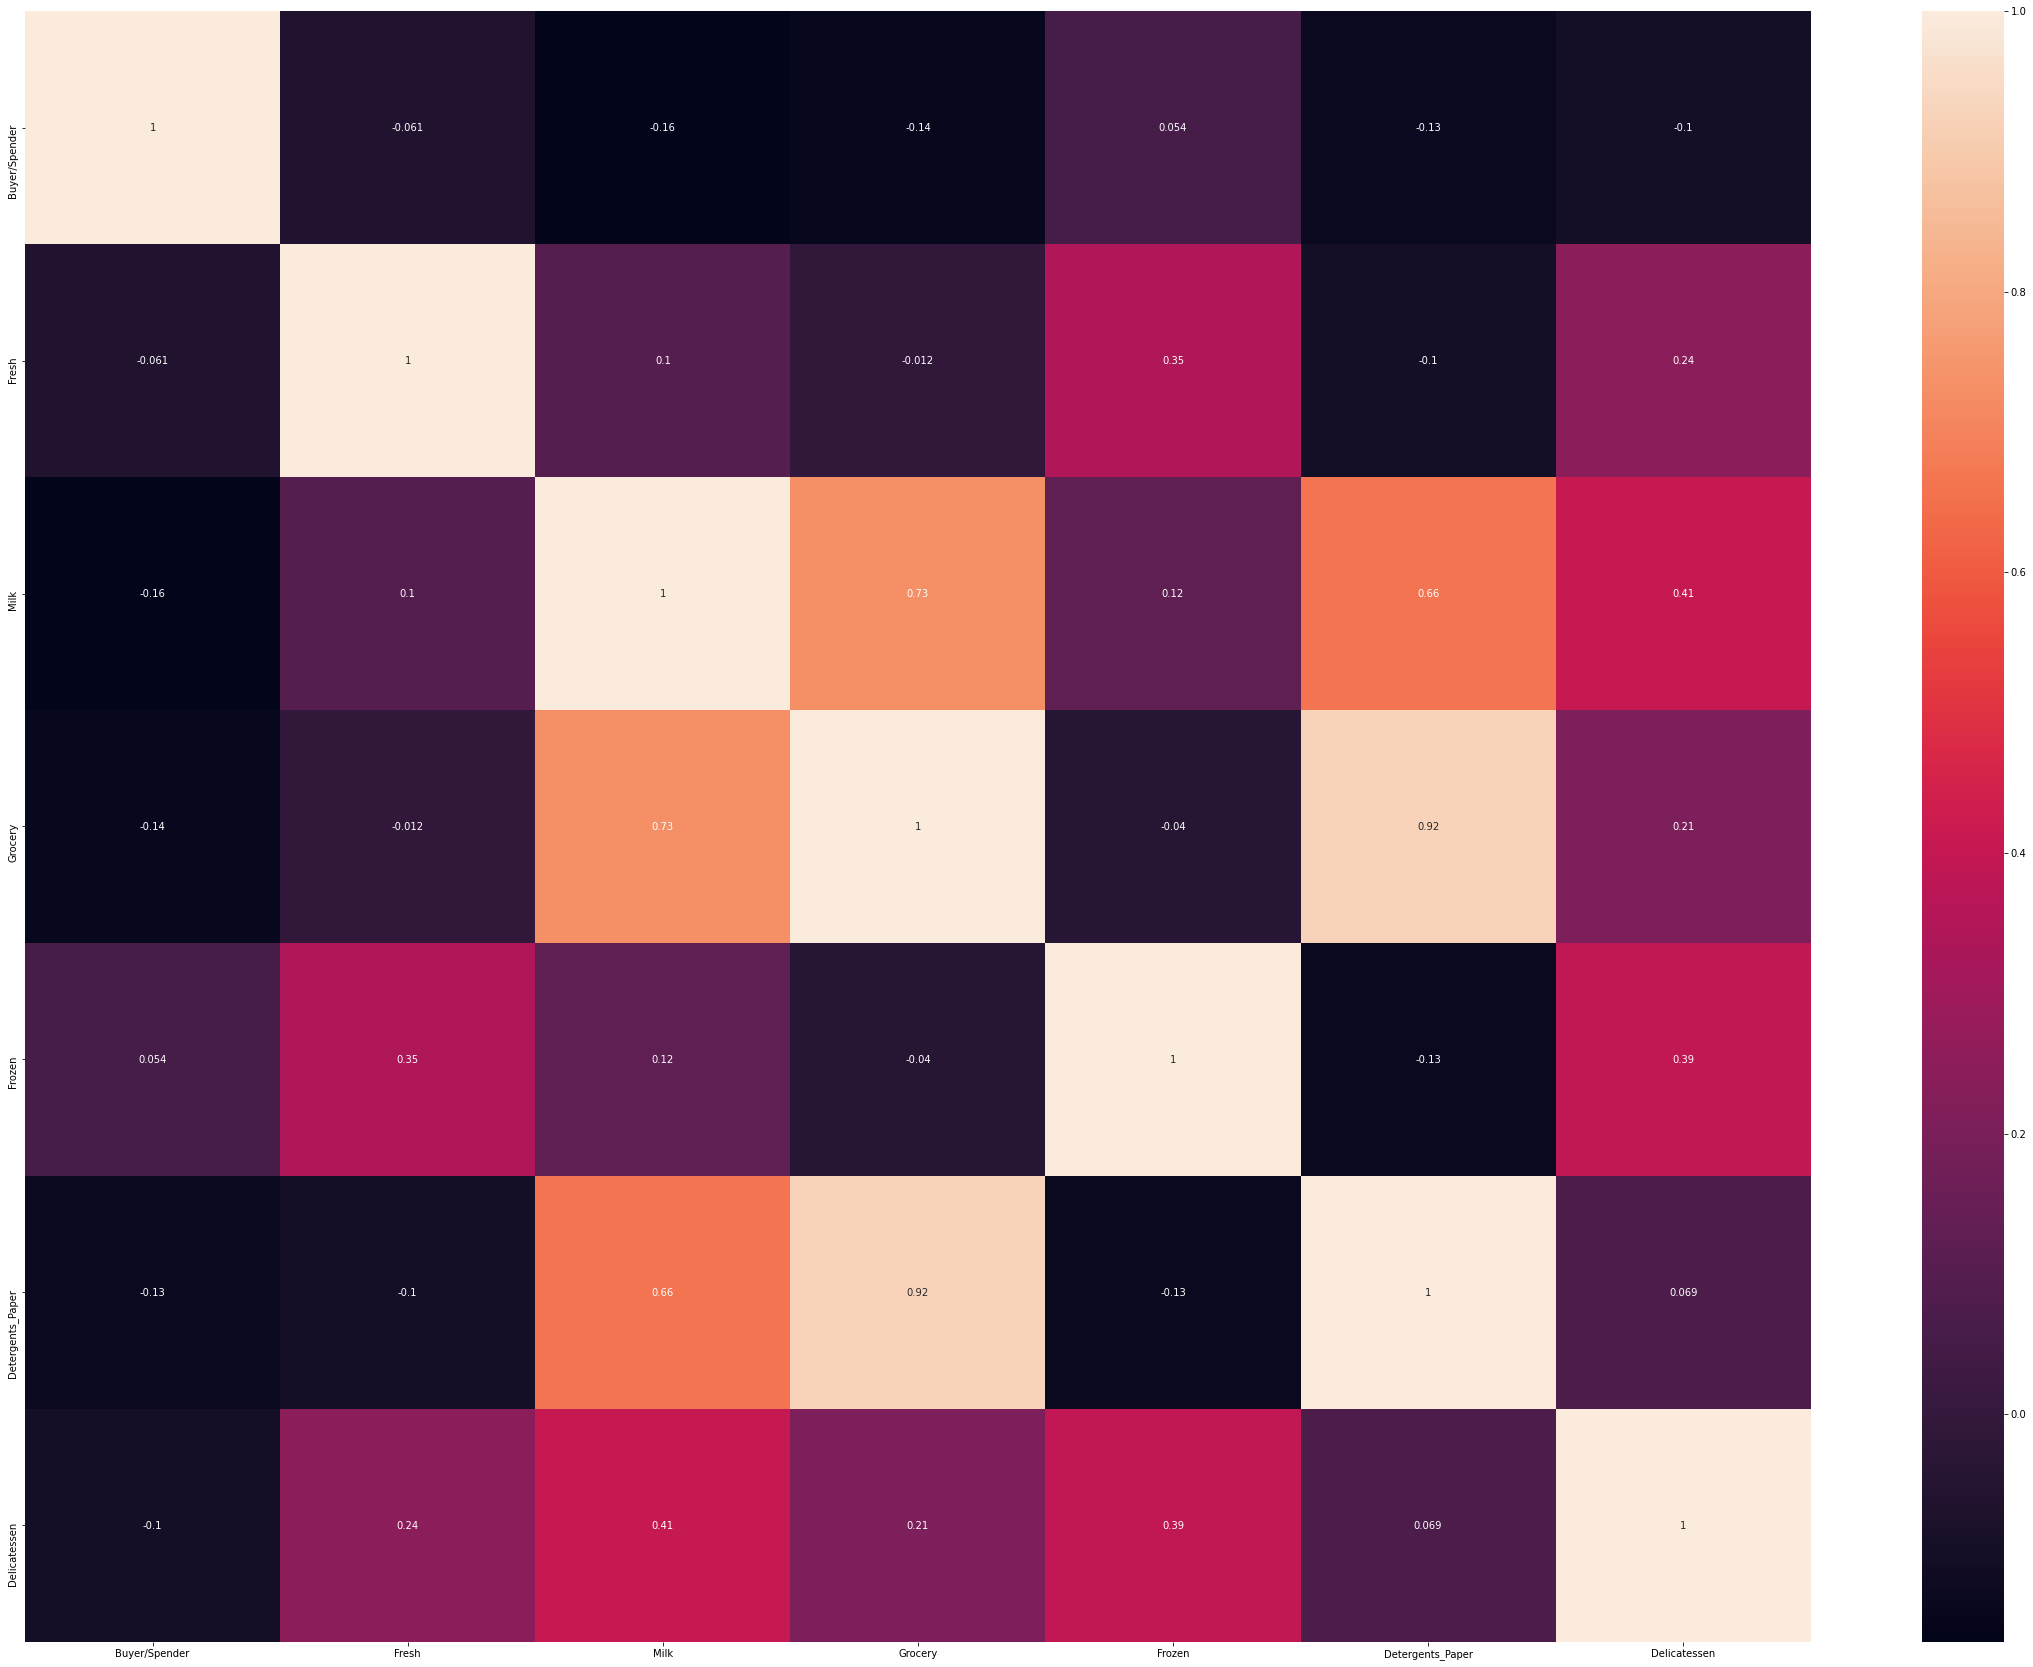

In [57]:
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(),annot=True)
